In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import json
import numpy as np

In [2]:
with open("../moneypuck_datadict.json", "r") as fp:
    datadict = json.load(fp)

## Data Loading

In [3]:
career_game_by_game = pd.read_csv('http://moneypuck.com/moneypuck/playerData/careers/gameByGame/regular/skaters/8476459.csv')
career_summarized_by_season = pd.read_csv('http://moneypuck.com/moneypuck/playerData/careers/perSeason/regular/skaters/8476459.csv')

## Career (Game by Game) Inspection and Cleaning

In [4]:
career_game_by_game.head()

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,other,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,all,...,2.891,2.389,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,5on5,...,2.114,1.303,40.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,4on5,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,5on4,...,0.696,0.000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.set_option("display.max_columns", 200)
print(career_game_by_game.columns.to_list())

['playerId', 'season', 'name', 'gameId', 'playerTeam', 'opposingTeam', 'home_or_away', 'gameDate', 'position', 'situation', 'icetime', 'shifts', 'gameScore', 'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped', 'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone', 'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts', 'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped', 'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes', 'I_F_faceOffsWon', 'I_F_hits', 'I_F_takeaways', 

In [6]:
datadict["onIce_F_"]

KeyError: 'onIce_F_'

In [7]:
career_game_by_game['gameDate'] = pd.to_datetime(career_game_by_game['gameDate'], format= '%Y%m%d') #formats to datetime

## Weighted Average script

In [75]:
def weighted_average(inputarray, weightarray):
    length_of_input = len(inputarray)
    sum_of_input = sum(inputarray)
    average = sum_of_input/length_of_input 
    print(sum_of_input)
    print(length_of_input)
    print(average)

In [76]:
weighted_average(careerall['onIce_xGoalsPercentage'])

293.2086000000002
547
0.5360303473491778


## Different Filters

In [8]:
mika2019 = career_game_by_game[career_game_by_game['season'] == 2019] #2019 filter
mika20195on5 = mika2019[mika2019['situation'] == '5on5'] #2019 5on5 filter
mika2019all = mika2019[mika2019['situation'] == 'all'] #2019 all situations filter
careerall = career_game_by_game[career_game_by_game['situation'] == 'all'] #all situations career

In [78]:
careerall.head()

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
1,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,2011-10-07,C,all,780.0,19.0,-0.120,0.2659,0.5475,0.2609,0.5000,0.2632,0.4444,9.0,0.790,0.033,0.032,0.219,0.018,0.345,0.352,0.033,0.032,0.032,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.0,0.895,1.0,0.954,0.0,0.006,0.0,0.0,0.039,0.038,0.038,19.0,3.0,0.0,3.0,13.0,4.0,5.0,4.0,6.0,4.0,6.0,2820.0,0.0,2.0,

## Weighted Average Testing

In [10]:
wshsize = careerall[careerall['opposingTeam'] == 'WSH'] #gets the size of opposing team play instances

In [12]:
np.full(wshsize.shape[0], wshsize.shape[0]) #example of array of uniqur matchup

array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25])

In [13]:
careerall[careerall['opposingTeam'] == 'WSH']['onIce_xGoalsPercentage'].shape

(25,)

In [14]:
np.average(careerall[careerall['opposingTeam'] == 'WSH']['onIce_xGoalsPercentage'], weights = np.full(wshsize.shape[0], wshsize.shape[0]), axis = 0) #finds the weighted average of the expected goals percentage against Washington

0.532392

In [15]:
opposingteams = careerall['opposingTeam'].unique()

## Team Bar Plot

In [19]:
plt.figure(figsize = (8,8))


for team in careerall['opposingTeam'].unique():
    teammatchup = careerall[careerall['opposingTeam'] == team]
    sns.barplot(x = careerall["opposingTeam"], y = np.average(careerall[careerall['opposingTeam'] == team]['onIce_xGoalsPercentage'], weights = np.full(teammatchup.shape[0], teammatchup.shape[0]), axis = 0))

AttributeError: 'bool' object has no attribute 'all'

In [ ]:
sns.barplot()

In [ ]:
tips.

In [50]:
pos = list(range(len(careerall['opposingTeam'].unique())))
width = 0.25

fig, ax = plt.subplots(figsize = (10,10))

rate_of_increase = 0
#for the team in all unique teams
for i, team in enumerate(careerall['opposingTeam'].unique()):
    #pick a team matchup
    teammatchup = careerall[careerall['opposingTeam'] == team]
    #get the weighted average of a percentage in that matchup
    #save that to a variable
    weightedavg_onicexgoalspercentage = np.average(teammatchup['onIce_xGoalsPercentage'], weights = np.full(teammatchup.shape[0], teammatchup.shape[0]), axis = 0)
    weightedavg_officexgoalspercentage = np.average(teammatchup['offIce_xGoalsPercentage'], weights = np.full(teammatchup.shape[0], teammatchup.shape[0]), axis = 0)
    
    
    #plot a barplot with the associated team and matching variable
    plt.bar(i, weightedavg_onicexgoalspercentage, width, alpha = 0.5, color = '#EE3224')
    plt.bar(i + width, weightedavg_officexgoalspercentage, width, alpha = 0.5, color = '#F78F1E')
    #do multiple percentages
    plt.xticks(i, team)
    
    #iterate the team and barplot position

#plt.bar(pos, )
#name the teams

TypeError: object of type 'int' has no len()

## Plots

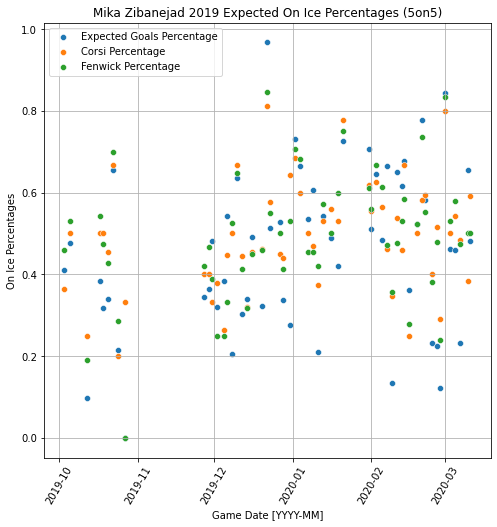

In [67]:
plt.figure(figsize = (8,8))

sns.scatterplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'])
sns.scatterplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_corsiPercentage'])
sns.scatterplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_fenwickPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Expected Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'upper left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

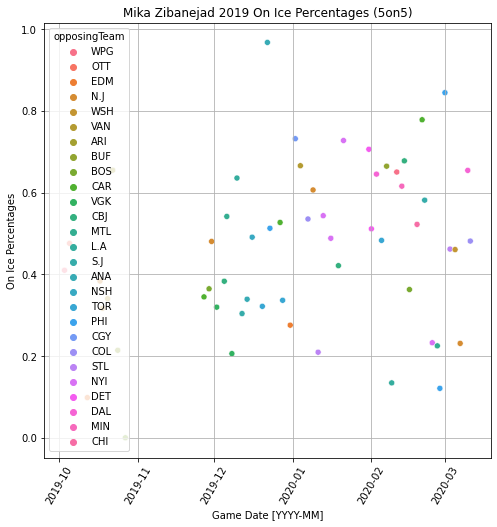

In [51]:
plt.figure(figsize = (8,8))

sns.scatterplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'], hue = mika20195on5['opposingTeam'])

plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.title('Mika Zibanejad 2019 On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

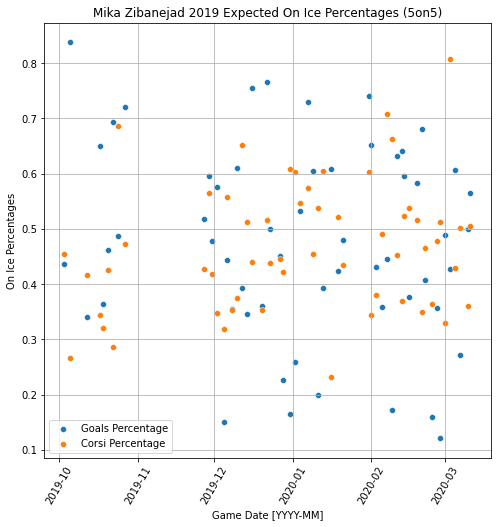

In [63]:
plt.figure(figsize = (8,8))

#sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['I_F_xGoals'])
sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['onIce_xGoalsPercentage'])
sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['offIce_xGoalsPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'lower left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

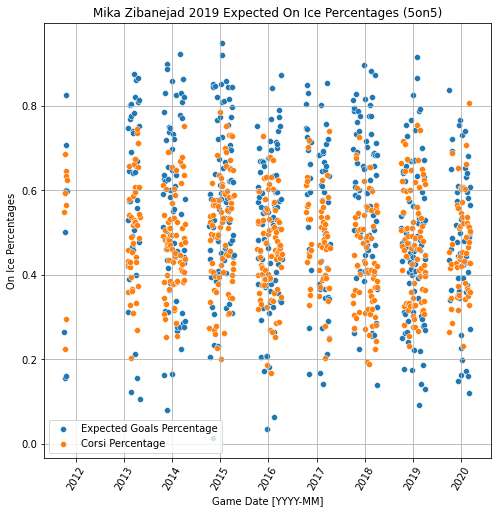

In [68]:
plt.figure(figsize = (8,8))

#sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['I_F_xGoals'])
sns.scatterplot(x = careerall['gameDate'], y = careerall['onIce_xGoalsPercentage'])
sns.scatterplot(x = careerall['gameDate'], y = careerall['offIce_xGoalsPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Expected Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'lower left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

### Ideas for Mika EDA:

- game by game timeseries line graph of "onIce_xGoalsPercentage". Can expand to year-by-year bar graphs. Can also expand by team. Should also cross-reference this for discovering which teams are teams Mika is best able to score on and which teams are harder for Mika to score on. 

- look into "offIce_xGoalsPercentage" with similar format above ^

- look into corsi percentage with similar format above^

- look into fenwick percentage with similar format above^

- all of such stuff should be looked at as a time series. 

- look into individual expected goals, on ice expected goals, and actual goals for Mika

- look into onIce expected goals and off ice extected goals

- look into i_f_xfreeze, and i_f_xrebounds, i_f_xplaycontinuedinzone, 